In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-classification/insurance_classification.csv


In [2]:
#Import Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

# Insurance Clustering Analysis and Multiple Regression

Data science could be beneficial for insurance companies to determine their pricing strategy. Some customer characteristics help to identify high risk customer profiles and how to make decisions about the insurance premium and coverage. I explore the patterns in this dataset. First of all, I import the data and catch a glimpse of the attributes.
After, I explore the data by visualizing the data. 
You can do a lot of different analysis with this dataset. I assume that the data is unlabled. So, I do a clustering analysis using unsupervised machine learning and kmeans clustering. 
Lastly, I build a multiple regression model.

In [3]:
path = '/kaggle/input/insurance-classification/insurance_classification.csv'

df = pd.read_csv(path)
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

The dataset contains various customer characteristics:  age, gender, bmi, the number of children a person, if the person is a smoker, the region where the insured customer lives, and the expenses incurred by the insured person. There are 4 regions, and the dataset has no missing values.

# Data Visualization

Data visualization is an important step in exploring the dataset. I explore the dispersion of bmi and expenses in each region. Also, I would like to know the dispersion of bmi and expenses by gender. 

<Axes: title={'center': 'Dispersion of Region and BMI'}, xlabel='region', ylabel='bmi'>

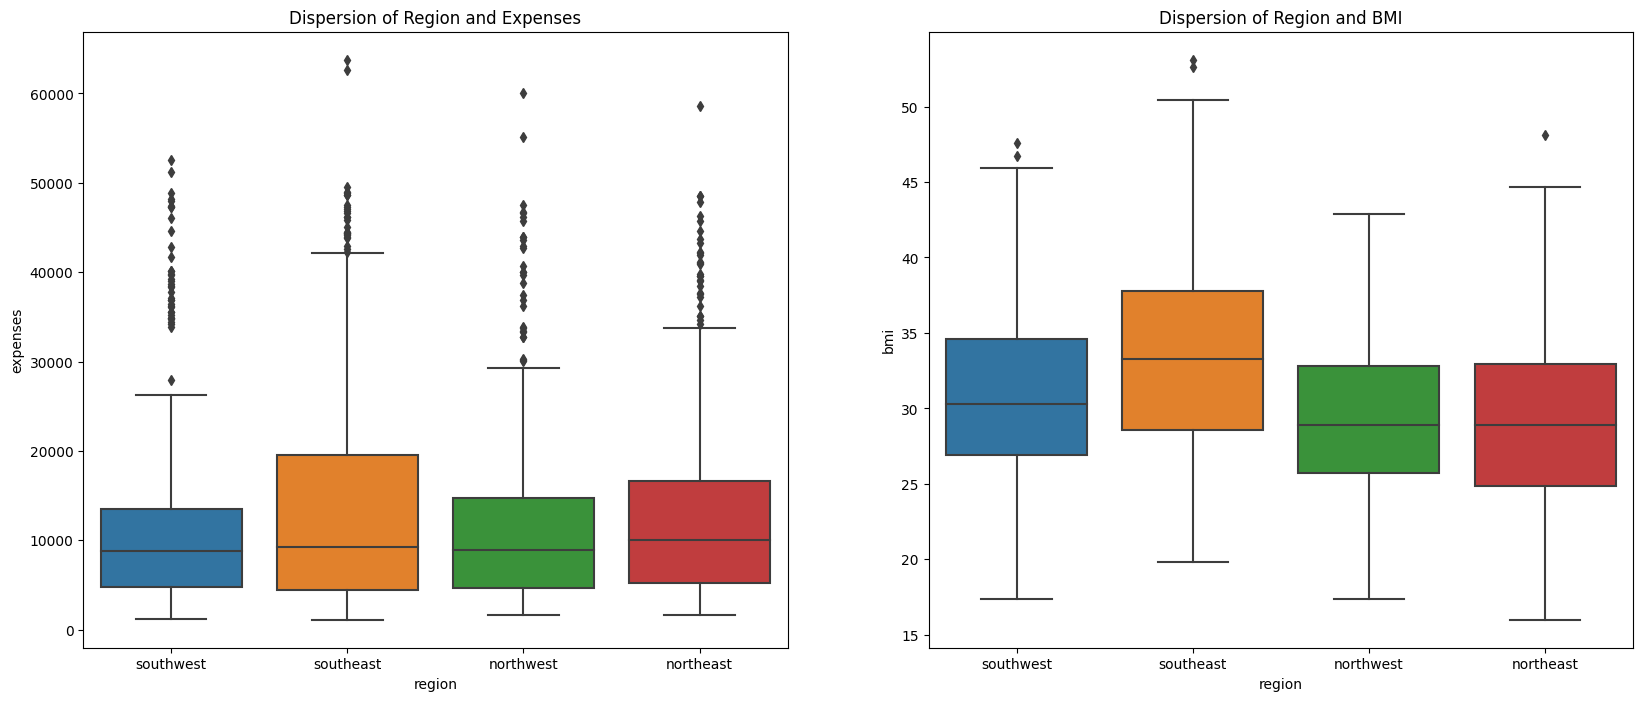

In [8]:
#boxplot Plot
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1.set_title("Dispersion of Region and Expenses")
sns.boxplot(x='region',y='expenses',data=df)

ax2 = fig.add_subplot(122)
ax2.set_title("Dispersion of Region and BMI")
sns.boxplot(x='region',y='bmi',data=df)


<Axes: title={'center': 'Gender and BMI'}, xlabel='sex', ylabel='bmi'>

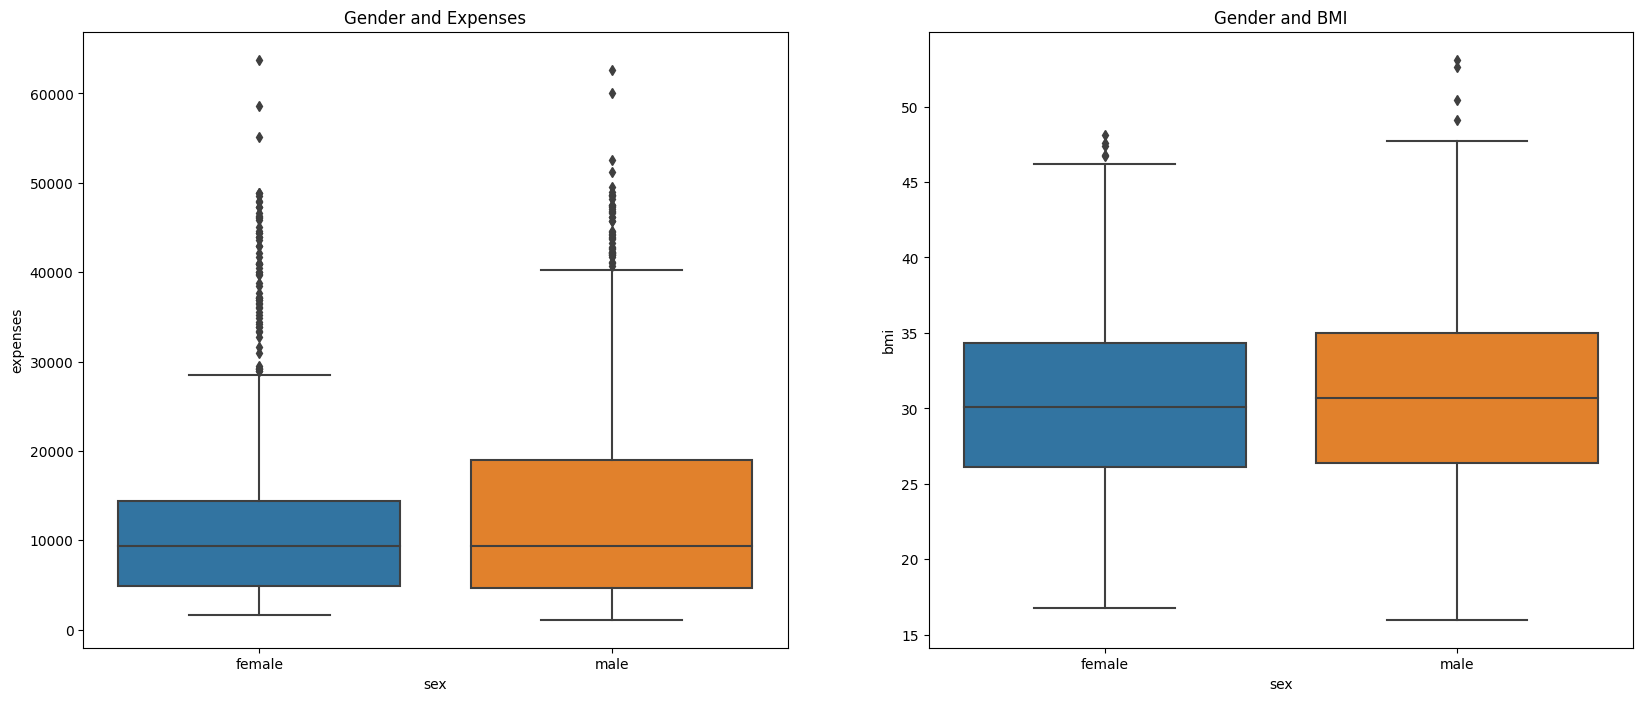

In [9]:
#boxplot Plot
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1.set_title("Gender and Expenses")
sns.boxplot(x='sex',y='expenses',data=df)

ax2 = fig.add_subplot(122)
ax2.set_title("Gender and BMI")
sns.boxplot(x='sex',y='bmi',data=df)

<Axes: title={'center': 'Smoker and Region'}, xlabel='region', ylabel='count'>

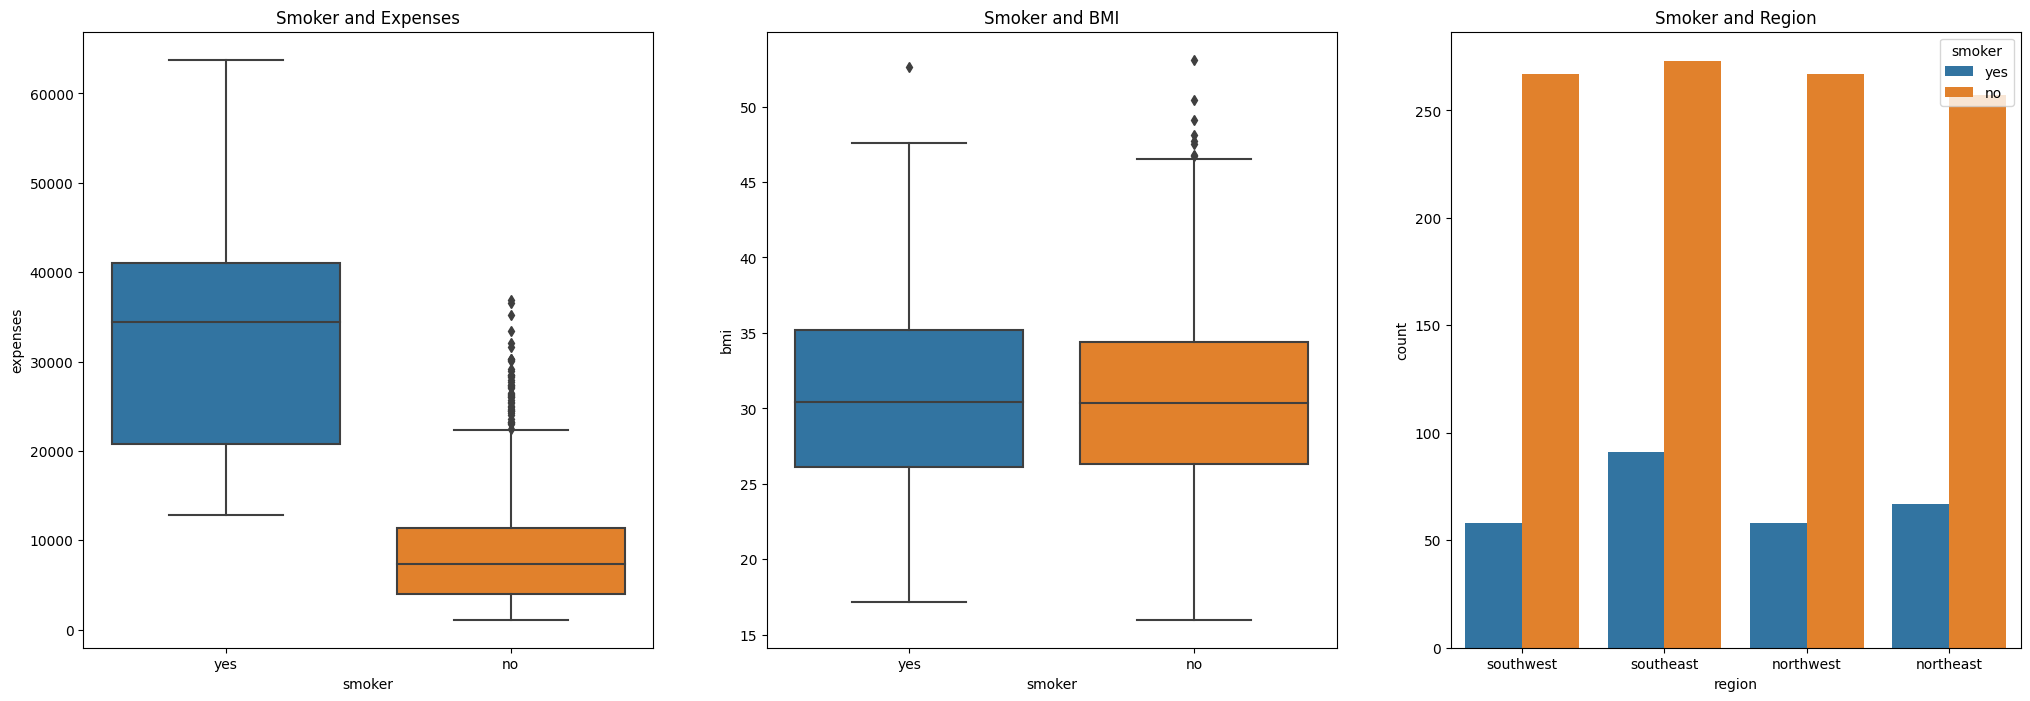

In [10]:
#boxplot Plot
fig = plt.figure(figsize=(25,8))

ax1 = fig.add_subplot(131)
ax1.set_title("Smoker and Expenses")
sns.boxplot(x='smoker',y='expenses',data=df)

ax2 = fig.add_subplot(132)
ax2.set_title("Smoker and BMI")
sns.boxplot(x='smoker',y='bmi',data=df)

ax3 = fig.add_subplot(133)
ax3.set_title("Smoker and Region")
sns.countplot(x='region',data=df,hue='smoker')



Text(0.5, 1.0, 'Expenses and bmi')

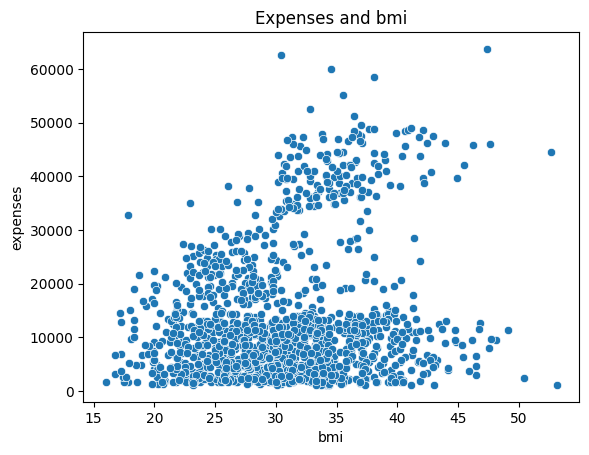

In [11]:
#Expenses and BMI
fig1 = sns.scatterplot(x='bmi',y='expenses',data=df)
fig1.set_title('Expenses and bmi')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

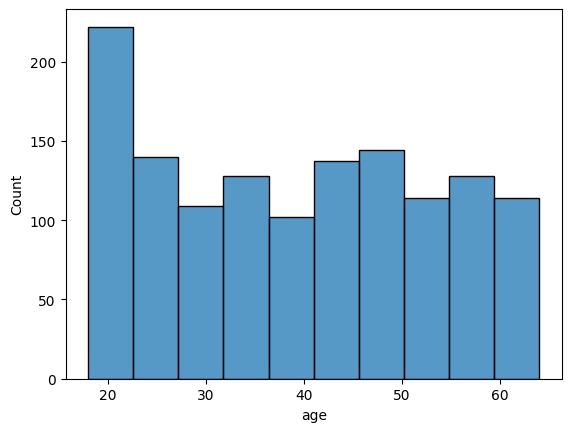

In [12]:
#age distribution
sns.histplot(x=df.age,bins=10)


In [13]:
df['age_bins'] = pd.cut(x=df['age'], bins=[10,20,30,40,50,60,70])
df.head()

,age,sex,bmi,children,smoker,region,expenses,age_bins
0,19,female,27.9,0,yes,southwest,16884.92,"(10, 20]"
1,18,male,33.8,1,no,southeast,1725.55,"(10, 20]"
2,28,male,33.0,3,no,southeast,4449.46,"(20, 30]"
3,33,male,22.7,0,no,northwest,21984.47,"(30, 40]"
4,32,male,28.9,0,no,northwest,3866.86,"(30, 40]"


In [14]:
expenses_by_age = df.groupby(['age_bins']).expenses.mean().reset_index()
print(expenses_by_age)

   age_bins      expenses
0  (10, 20]   8713.482771
1  (20, 30]   9806.025432
2  (30, 40]  11639.308716
3  (40, 50]  14782.043132
4  (50, 60]  17062.293019
5  (60, 70]  21063.163407


/tmp/ipykernel_18/3252879956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expenses_by_age = df.groupby(['age_bins']).expenses.mean().reset_index()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Expenses')

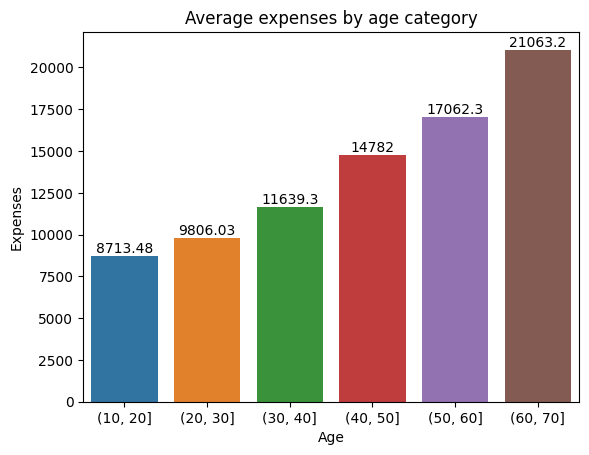

In [15]:
ax = sns.barplot(x='age_bins', y='expenses', data=expenses_by_age)
ax.bar_label(ax.containers[0])
ax.set_title('Average expenses by age category')
ax.set_xlabel('Age')
ax.set_ylabel('Expenses')

Almost each age category has the same number of observations. The average expenses increase when people get older. Looking at the average expenses by region, each region has approximately the same average expenses. Each region has some outliers. The average BMI is highest in the southeast; also, the dispersion of expenses is highest in the southeast. The average bmi and expenses are approximately the same for men and women.

# Data Cleaning

The dataset contains 3 objects or 3 columns with text. Let's turn them into numerical values. 

In [16]:
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southwest':1,'northwest':2,'northeast':3,'southeast':4})
df = df.drop(columns=('age_bins'))
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,4,1725.55
2,28,1,33.0,3,0,4,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [17]:
variables = df[['age','sex','bmi','children','smoker','region']]

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'bmi'),
 Text(3.5, 0, 'children'),
 Text(4.5, 0, 'smoker'),
 Text(5.5, 0, 'region')]

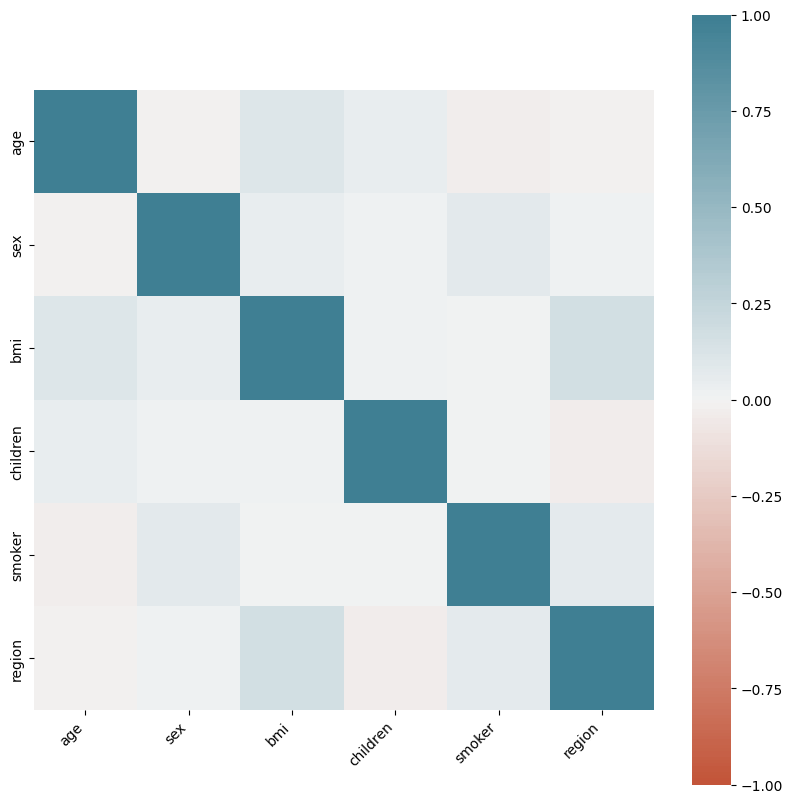

In [18]:
#correlation of variables: correlation diagram
fig, ax = plt.subplots(figsize=(10,10))
corr = variables.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

I check the correlation of the variables. None of the variables are strongly correlated with each other. This is called multicollinearity when independent variables in a model are (highly) correlated with each other. None of the variables in the heat map have a bigger correlation than 0.25 or -0.25 which is good. So, if I build the model, no multicollinearity does exist. This makes it better to interpret the coefficents later on. 

# Clustering with Multiple Features

Looking at the data, I first make the assumption that the data is unlabled. So, a clustering analysis with kmeans would be perfect. I normalize the data first.

In [19]:
scaler =StandardScaler()

features =scaler.fit(df)
features =features.transform(df)

# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,-1.365198,0.298583
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,1.288509,-0.953689


In [20]:
features_clustering=scaled_df.values

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

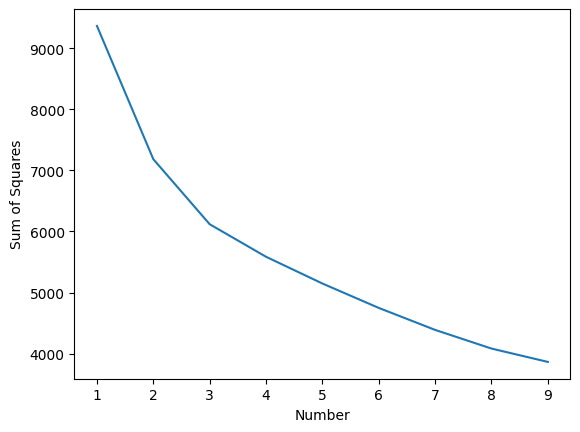

In [21]:
#find the optimal number of clusters
cluster_maximum = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(features_clustering)
    cluster_maximum.append(kmeans.inertia_)

plt.plot(np.arange(1, 10), cluster_maximum)
plt.xlabel("Number")
plt.ylabel("Sum of Squares")
plt.show()


The 'elbow' is at 3. So, I add 3 components to the kmeans clustering model. Adding an extra component would add little information after this point.

In [22]:
#The Model
kmeans=KMeans(n_clusters=3)
kmeans.fit(features_clustering)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
kmeans.cluster_centers_

array([[-4.93016174e-02,  1.50128782e-01,  7.81939467e-03,
         1.51205483e-02,  1.97058663e+00,  1.35986599e-01,
         1.55134714e+00],
       [-1.03334188e-02,  9.89590795e-01,  1.75308023e-02,
        -1.72148403e-03, -5.07463099e-01, -2.38013464e-02,
        -4.28170986e-01],
       [ 3.44625606e-02, -1.01051870e+00, -2.04861772e-02,
        -5.94702558e-03, -5.07463099e-01, -4.56216309e-02,
        -3.72403506e-01]])

In [24]:
kmeans.labels_


array([0, 1, 1, ..., 2, 2, 0], dtype=int32)

In [25]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(features_clustering),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()


,PCA1,PCA2
0,0.625087,-2.177854
1,-0.939778,0.855289
2,-0.530303,0.881445
3,-0.229042,-1.150687
4,-1.061138,-0.317171


In [26]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers


array([[ 2.31851648, -0.80688325],
       [-0.50793957,  0.21498461],
       [-0.68129572,  0.20098532]])

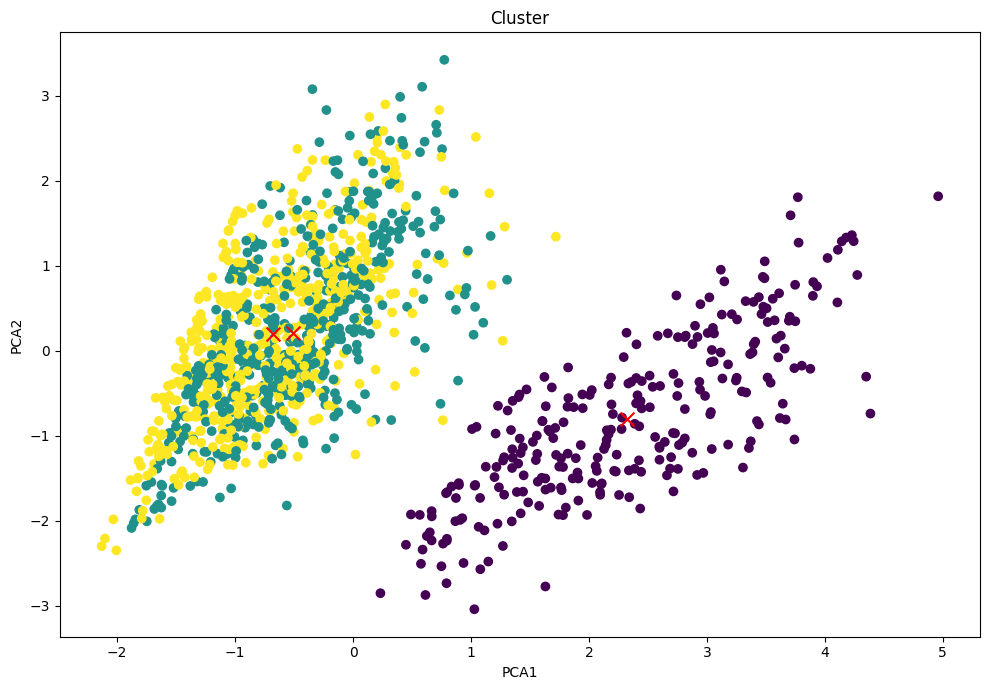

In [27]:
plt.figure(figsize=(10,7))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster')
plt.tight_layout()


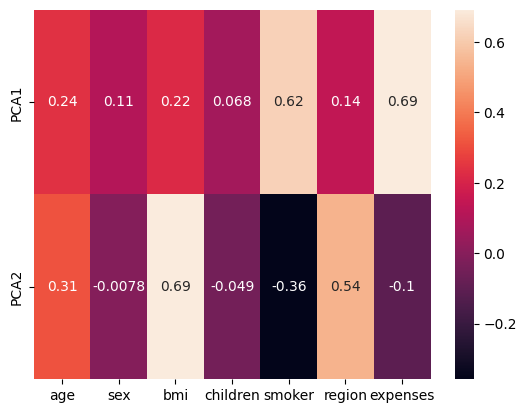

In [28]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df.columns)
# Heat map
sns.heatmap(component_df,annot=True)
plt.show()


I build a kmeans clustering model with 3 components. The 'elbow' at the scree plot is at 3. The scree plot shows the variances to keep in a pricipal component; each component after the elbow does not significantly contribute more information to the model. In this analysis, I use principle component analysis. This technique transforms higer dimensional data into fewer dimensional data (or a summary of features), preserving the most important information in features. I minimize the dataset from 7 features to 2 features using Principle Component Analysis (PCA). The 2 axes in the scatter plot represent the variation in components or direction of maximum variance in the dataset; PC1 is the most variation in data, and PC2 is the second most variation in data. Each cluster in this analysis has a cluster center. I mark the cluster center with a red 'x' in the scatter plot. Each insurance customer that has the same profile has been clustered together. 
Then, if you look at the heatmap, PCA1 is moderately correlated with 2 out of the 7 original variables (smoker and expenses), and it is weakly correlated with age and bmi. People with high expenses are more likely to be smokers.



# Multiple Linear Regression

In this section, I build a multiple linear regression model. How do age, gender, bmi, children, smoker and region have an effect on expenses? 
Age, gender, bmi, children, smoker, and region are the independent variables, and expenses is the dependent variable.

In [29]:
scaled_df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,-1.365198,0.298583
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,1.288509,-0.953689


In [30]:
X = scaled_df[['age','sex','bmi','children','smoker','region']]
Y = scaled_df['expenses']

In [31]:
X[0:5]

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,-1.365198
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,1.288509
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,1.288509
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.480629
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.480629


In [32]:
Y[0:5]

0    0.298583
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: expenses, dtype: float64

I split the dataset into a training set and a test set. The test set is equal to 25% of the dataset.

In [33]:
#split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=0)

In [34]:
print ('The length of the train set is:', X_train.shape,  Y_train.shape)
print ('The lenth of the test set equals:', X_test.shape,  Y_test.shape)

The length of the train set is: (1003, 6) (1003,)
The lenth of the test set equals: (335, 6) (335,)


In [35]:
regressionmodel = linear_model.LinearRegression()
regressionmodel.fit(X_train, Y_train)


LinearRegression()

In [36]:
#make predictions
Y_pred = regressionmodel.predict(X_train)

How much does the actual value deviate from the predicted value?

Text(0, 0.5, 'Predicted')

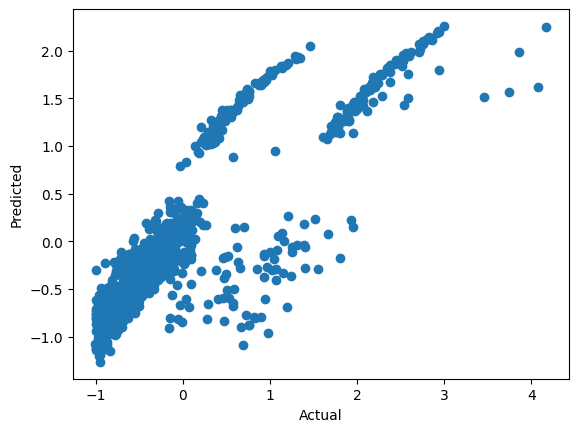

In [37]:
plt.scatter(Y_train,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

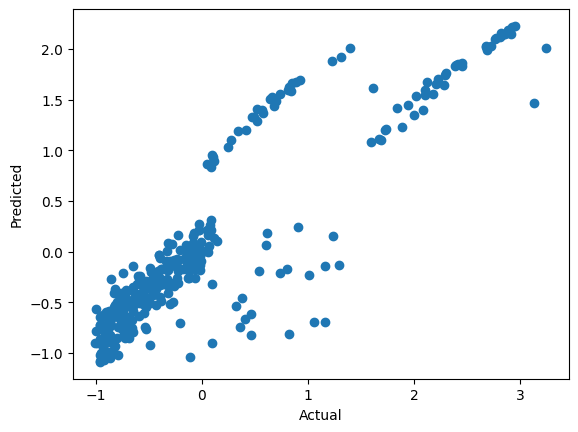

In [38]:
Y_pred_test = regressionmodel.predict(X_test)
plt.scatter(Y_test,Y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [39]:
#Model evaluation metrics
R_squared = regressionmodel.score(X_test,Y_test)
print("The R-squared equals:",R_squared)

The R-squared equals: 0.7951544252833257


In [40]:
#Model evaluation metrics
R_squared = regressionmodel.score(X_train,Y_train)
print("The R-squared equals:",R_squared)

The R-squared equals: 0.7327650334558393


The R-squared of the test dataset equals 0.795, whereas the R-squared of the training dataset equals 0.732. The regression model explains approximately 3/4 of variation in expenses. Is it good? A higher R-squared generally means a better fit. Yes, this is a reasonable fit. 

In [41]:
#model intercept
print("The intercept equals:",regressionmodel.intercept_)
print("The coefficients equals:",regressionmodel.coef_)

The intercept equals: -0.0013069829267621114
The coefficients equals: [ 2.92059456e-01  5.56986287e-04  1.58854577e-01  4.35087267e-02
  7.87848532e-01 -3.48072605e-03]


In [42]:
#The Model
# add a constant
X2 = sm.add_constant(X_train)

regressionmodel_constant = sm.OLS(Y_train, X2)

# fit the model
results = regressionmodel_constant.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     455.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          2.63e-281
Time:                        15:35:49   Log-Likelihood:                -748.75
No. Observations:                1003   AIC:                             1512.
Df Residuals:                     996   BIC:                             1546.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.016     -0.081      0.9

Lastly, I add a constant to the Ordinary Least Squares Model. The R-squared is 0.73 which is a reasonable fit. Looking at a confidence interval of 95%, the following coefficients are significant: age, bmi, children, and smoker.
The null hypothesis of the variable being not significant is rejected. The constant, gender, and region are not significant.
In addition, the Durbin-Watson test statistic is available. This test statistic always has a value between 0 and 4; the test statistic indicates if the variables are autocorrelated. 
The output is 2.008 here. This indicates that no autocorrelation has been detected in het model and multicollinearity does not exist. This is consistent with the correlation diagram at the beginning of this notebook.


**This is the end of this notebook. Thanks for opening this notebook!**